# Predicting heart disease using machine learning

This notebook uses various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether someone has heart disease or not based on their medical attributes.

### I'm going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
7. Conclusion


## 1. Problem Defination

In a statement,
> **Given clinical parameters about a patient, can we predict if they have heart disease or not?**

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> **If I can reach 95% accuracy at predicting if the patient has heart disease or not during the proof of concept, I'll pursue the project.**

## 4. Features

**Data dictionary**

1. **age** - age in years
2. **sex** - (1 = male; 0 = female)
3. **cp** - chest pain type
   - 0: Typical angina: chest pain related decrease blood supply to the heart
   - 1: Atypical angina: chest pain not related to heart
   - 2: Non-anginal pain: typically esophageal spasms (non heart related)
   - 3: Asymptomatic: chest pain not showing signs of disease
4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. **chol** - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 * triglycerides
   * above 200 is cause for concern
6. **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * '>126' mg/dL signals diabetes
7. **restecg** - resting electrocardiographic results
   - 0: Nothing to note
   - 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
   - 2: Possible or definite left ventricular hypertrophy
    * Enlarged heart's main pumping chamber
8. **thalach** - maximum heart rate achieved
9. **exang** - exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. **slope** - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. **ca** - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. **thal** - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)


# Tools Preparation
- `PANDAS`, `NUMPY` & `MATPLOTLIB` for Data Analysis and Manipulation
- `SCIKIT-LEARN` as Machine Learning Model

In [1]:
# Importing all the Tools
    
# Regular EDA and plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Tools
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score


# Load Data

In [2]:
df = pd.read_csv("heart.csv")

# Data Exploration/EDA
*The Goal here is to find out more about the data and try to become expert at the given dataset*

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

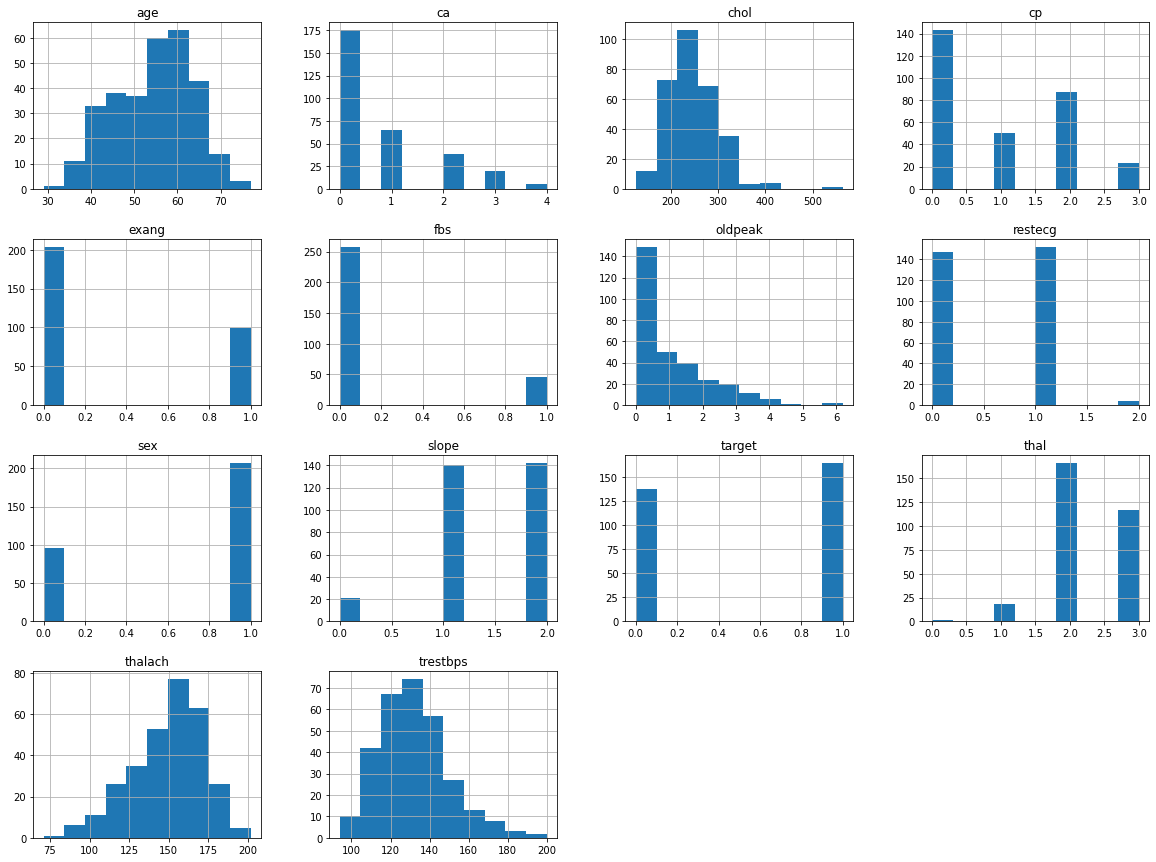

In [9]:
# Data Distribution in our Dataset
df.hist(figsize=(20,15));

In [10]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

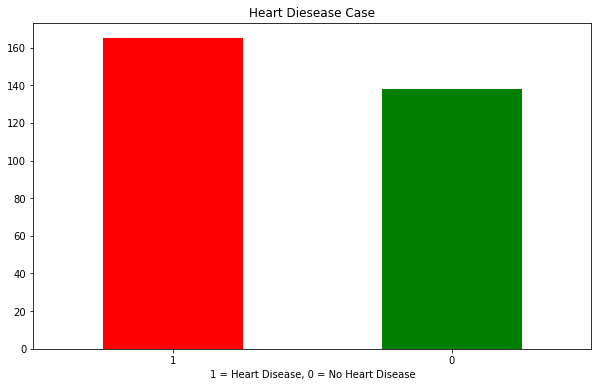

In [11]:

df["target"].value_counts().plot(kind="bar", color=["red", "green"], title="Heart Diesease Case",figsize=(10, 6), rot=0)
plt.xlabel("1 = Heart Disease, 0 = No Heart Disease");


## Heart Diesease Frequency accoarding to Sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


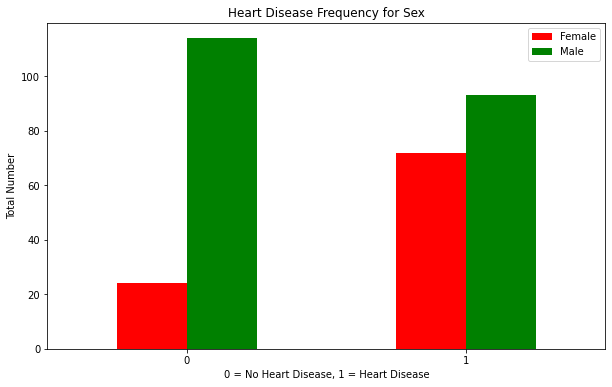

In [14]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["red", "green"], title="Heart Disease Frequency for Sex",figsize=(10, 6), rot=0 )
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Total Number")
plt.legend(["Female", "Male"]);

# Age vs. Max Heart Rate for Heart Disease

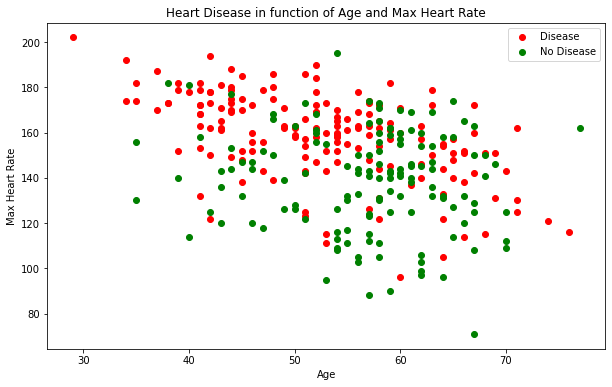

In [15]:
plt.figure(figsize=(10, 6))

# Scatter with Heart Disease
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="red")

# Scatter without Heart Disease
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="green")

# Adding general info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);


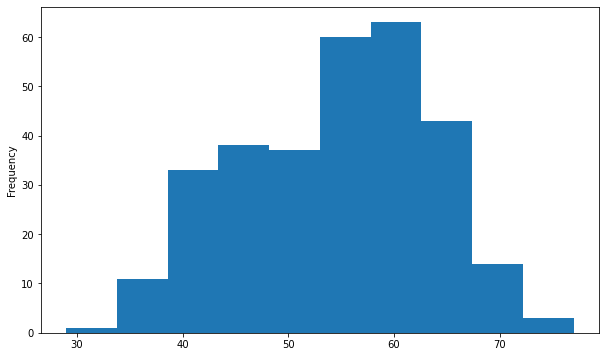

In [16]:
# Distribution of the age using Histogram
df.age.plot.hist(figsize=(10, 6));

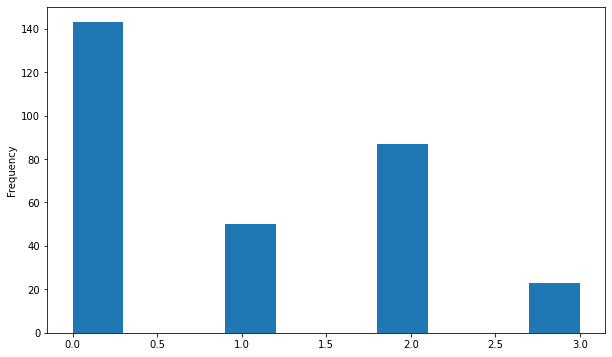

In [17]:
# Distribution of the chest pain using Histogram
df.cp.plot.hist(figsize=(10, 6));

# Heart Disease Frequency per Chest Pain

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


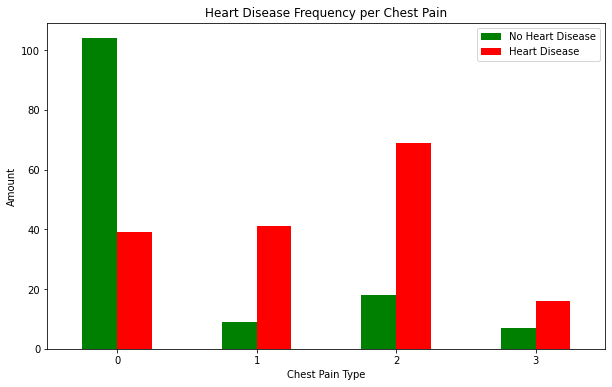

In [19]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color = ["green", "red"],
                                   title="Heart Disease Frequency per Chest Pain",
                                   rot=0)

# General infos
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Heart Disease"]);

# Correlation Matrix

In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


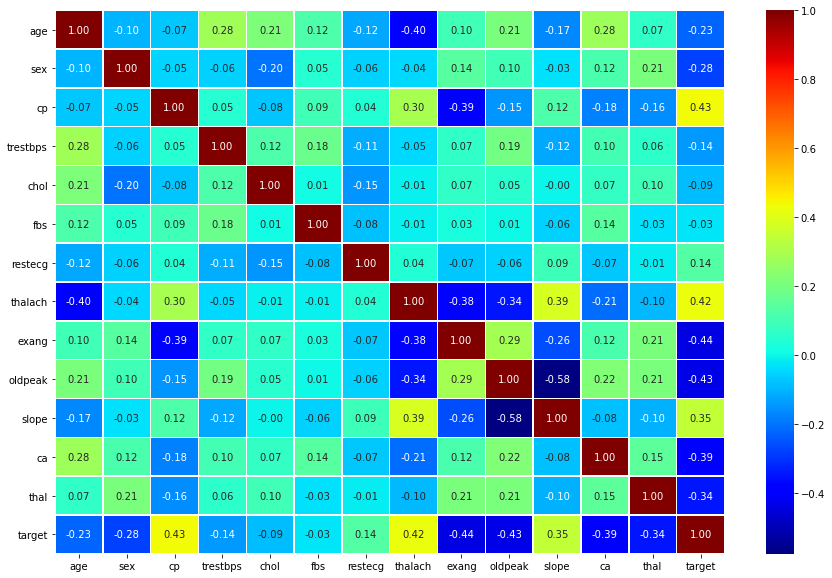

In [21]:
# Visual Correlation Matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="jet");

#  5. Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split Data into X and y
X = df.drop("target", axis=1)

y = df.target

In [24]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
# Splitting Data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=27)

In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3


In [28]:
y_train

160    1
219    0
48     1
178    0
270    0
      ..
293    0
240    0
31     1
184    0
19     1
Name: target, Length: 242, dtype: int64

# Model

### Let´s try 3 different machine learning model 
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [29]:
# Setting up models in dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Creating a helping function to fit and score our Models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluate given Machine Learning Models
    """
    # set random seed
    np.random.seed(27)
    # Empty Dictionary to add model scores
    model_scores = {}
    # Loop through our models
    for name, model in models.items():
        # fitting the data to the model
        model.fit(X_train, y_train)
        # Evaluate the model and adding it´s score in model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [30]:
# Calling the function

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

C:\Users\thepi\OneDrive\Desktop\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8524590163934426}

# Model Comparison

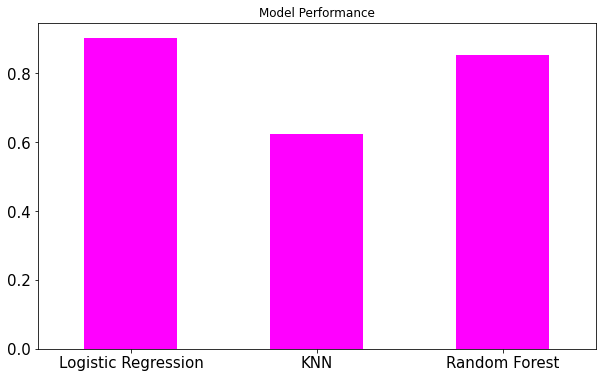

In [31]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot(kind="bar", colormap="spring", figsize= (10 , 6), rot=0, title = "Model Performance", legend=False, fontsize=15);

# 6. Experimentation

## Improving and Evaluating our Baseline Model :

- ### Hyperparameter tuning

    - Manually
    - with RandomizedSearchCV
    - with GridSearchCV
    
- ### Evaluating our Tuned Model

    - ROC curve and Area under the curve (AUC) Score
    - Confusion matrix
    - Classification report
    - Precision
    - Recall
    - F1 score
    
- ### Cross-validation Evaluation
- ### Feature importance

# Hyperparameter tuning (Manually)

### Tuning K-Nearest Neighbours Classifier

In [32]:
# Let's tune KNN

train_scores = []
test_scores = []

# Creating a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Looping through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [33]:
train_scores

[1.0,
 0.8016528925619835,
 0.7727272727272727,
 0.743801652892562,
 0.7851239669421488,
 0.7727272727272727,
 0.7603305785123967,
 0.743801652892562,
 0.7479338842975206,
 0.7107438016528925,
 0.7355371900826446,
 0.6942148760330579,
 0.7231404958677686,
 0.6942148760330579,
 0.7107438016528925,
 0.6942148760330579,
 0.71900826446281,
 0.7024793388429752,
 0.71900826446281,
 0.71900826446281]

In [34]:
test_scores

[0.5573770491803278,
 0.5901639344262295,
 0.6229508196721312,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.639344262295082]

Maximum KNN score on the test data: 67.21%


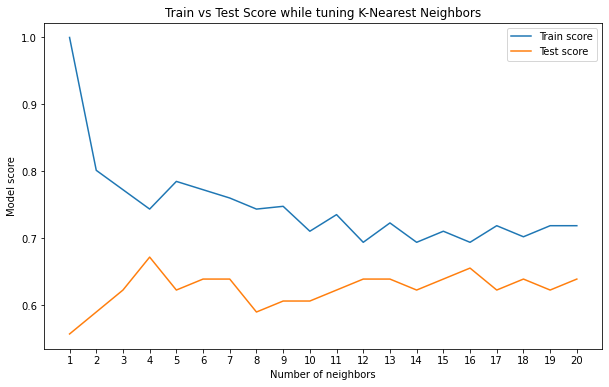

In [35]:
# Plotting Train and Test Scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.title("Train vs Test Score while tuning K-Nearest Neighbors")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV

### Tuning  `LogisticRegression ( )`
 

In [36]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"],
               "max_iter": np.arange(100, 1000, 100 )}


In [37]:
# Tuning LogisticRegression

np.random.seed(27)

# Setting up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fitting random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
# Finding the Best Hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 800, 'C': 10000.0}

In [39]:
# Evaluating the tuned model score
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### Tuning `RandomForest Classifier`

In [40]:
# Creating a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 2, 4, 8, 10, 12],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [41]:
# Setting up random seed
np.random.seed(27)

# Setting up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=100,
                           verbose=True)

# Fitting up random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 2, 4, 8, 10, 12],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
# Finding the best hyperparameters
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [43]:
# Evaluating the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8360655737704918

# Hyperparameter Tuning using GridSearchCV
#### Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [44]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"],
               "max_iter": np.arange(100, 800, 100 )}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=10,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2100 out of 2100 | elapsed:    7.6s finished


In [45]:
# Checking the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'max_iter': 100, 'solver': 'liblinear'}

In [46]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluating our Tuned Model

    - ROC curve and Area under the curve (AUC) Score
    - Confusion matrix
    - Classification report
    - Precision
    - Recall
    - F1 score

In [47]:
# Making predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [48]:
y_preds

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [49]:
y_test

110    1
3      1
122    1
70     1
140    1
      ..
223    0
186    0
290    0
63     1
74     1
Name: target, Length: 61, dtype: int64

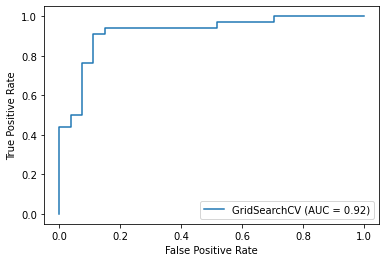

In [50]:
# Plotting ROC curve and calculating AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [51]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[23  4]
 [ 3 31]]


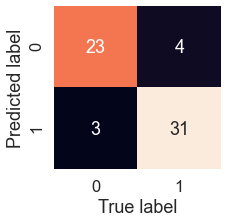

In [52]:
# Plotting Confusion matrix
sns.set(font_scale=1.5)

# creating helper function to plot confusion matrix heatmap
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test, y_preds)

In [53]:
# getting Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



# Calculate evaluation metrics using cross-validation

In [54]:
# Checking best hyperparameters
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'max_iter': 100, 'solver': 'liblinear'}

In [55]:
# Creating a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear",
                         max_iter= 100)


In [56]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [57]:
# getting mean value
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [58]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [59]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [60]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

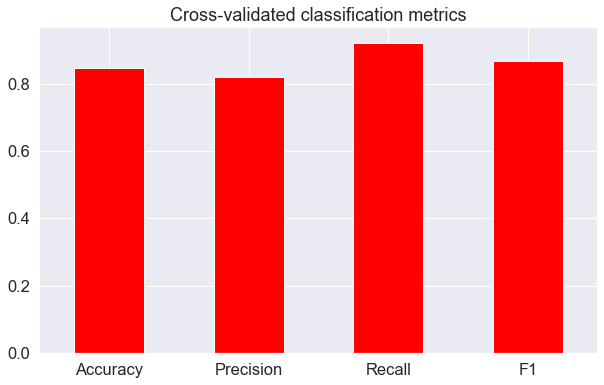

In [61]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False,figsize=(10, 6), rot=0, cmap="autumn");

# Feature Importance

In [62]:
# Fitting an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [63]:
# Checking coef_
clf.coef_

array([[ 0.00494992, -0.92742224,  0.65543302, -0.01738782, -0.00335554,
         0.12135495,  0.14327256,  0.03542998, -0.63170731, -0.36531553,
         0.23497607, -0.51821464, -0.7996754 ]])

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
# Matching coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.004949918623900636,
 'sex': -0.9274222388683669,
 'cp': 0.6554330199008455,
 'trestbps': -0.017387815862853987,
 'chol': -0.003355540136670788,
 'fbs': 0.1213549475068446,
 'restecg': 0.1432725614918509,
 'thalach': 0.0354299768704832,
 'exang': -0.6317073105072989,
 'oldpeak': -0.3653155321644592,
 'slope': 0.2349760689018042,
 'ca': -0.5182146403420644,
 'thal': -0.7996754035984954}

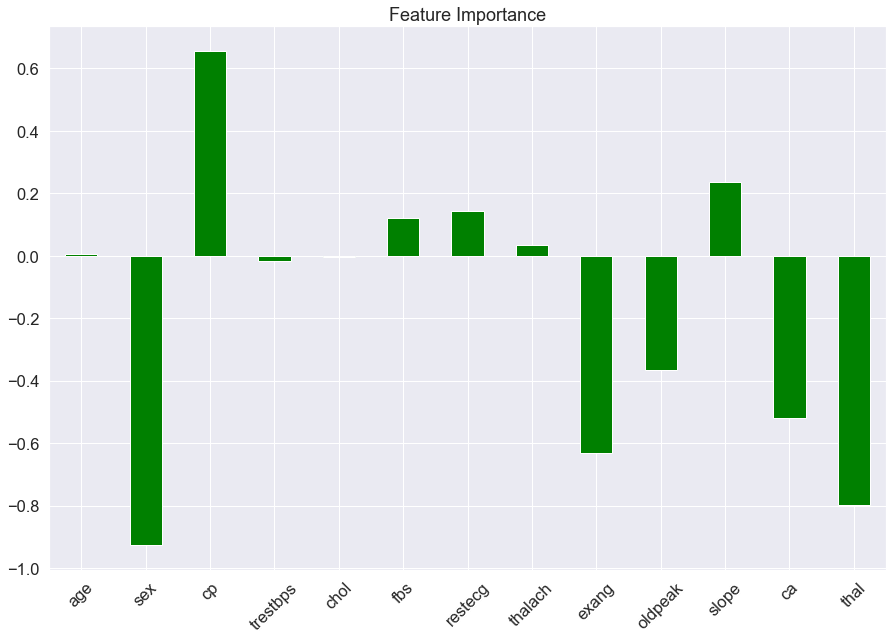

In [66]:
# Visualizing feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(15, 10), rot=45, cmap="ocean");

# 7. Conclusion

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease or not. 
After importing the data, I analysed it using EDA, then applied three Machine Learning algorithms, 
1. `K Neighbors Classifier`,
2. `RandomForestClassifier` & 
3. `LogisticRegressionClassifier`.

I varied parameters across each model to improve their scores. In the end, `LogisticRegressionClassifier` achieved the highest score of ~ 89% with 
> `C: 0.7278953843983146, max_iter: 100, solver: liblinear` as best Parameters

Unfortunately the results are not in my favor of more than 95% of Evaluation Metrics as I desired before starting this Projects but it still shows some promising Results. 

I believe I can acheive the desired Results of more than 95% using:
1. other Machine learning Models like `CatBoost` or `XGBoost`
2. with some More Datas
3. with more Hyperparameter Tuning